In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import h5py
import settings.Constants as const
from scipy.interpolate import UnivariateSpline

In [2]:
import matplotlib.cm as cm
colorsVzero = [cm.Reds(i) for i in [0.2, 0.5, 0.8, 1.0]]
colorsTzero = [cm.Greens(i) for i in [0.5, 0.7, 0.9, 1.0]]

In [3]:
Tvalue1 = 1e-4
couplingValue1 = 0.7
voltageSpace1 = np.array([0.0, 1.0782277033434142, 1.428227703343414, 1.778227703343414])
lambdaValue1 = 1.0
phiSpace1 = np.array([0.6240326492647392, 0.42573711514556517, 0.005572809566566326, 1.687291223119121e-09])


TSpace2 = np.array([1e-5, 1e-2, 0.1, 0.5])
couplingValue2 = 0.7
voltageSpace2 = 0.0
lambdaValue2 = 1.0
phiSpace2 = np.array([0.6240326491198824, 0.6238862915811568, 0.6090703984210056, 7.883874502977921e-10])

# omegaSpace =  np.linspace(-2.0, 2.0, 80)
omegaSpace =  np.linspace(-2.0, 2.0, 214)

In [4]:
h5_name = "h5_output_data/resultsCurrentNoiseIntV2.hdf5"
# h5_name = "resultsCurrentNoiseIntV2_clean.hdf5"

with h5py.File(h5_name, 'r') as f:
    
    retardedNonIntTzero = f['ShotNoise/NonIntRetardedTzero'][:]
    keldyshNonIntTzero = f['ShotNoise/NonIntKeldyshTzero'][:]
    
    retardedNonIntVzero = f['ShotNoise/NonIntRetardedTzero'][:]
    keldyshNonIntVzero = f['ShotNoise/NonIntKeldyshTzero'][:]
    
    retardedIntTzero = f['ShotNoise/IntRetardedTzero'][:]
    keldyshIntTzero = f['ShotNoise/IntKeldyshTzero'][:]
    
    retardedIntVzero = f['ShotNoise/IntRetardedVzero'][:]
    keldyshIntVzero = f['ShotNoise/IntKeldyshVzero'][:]
    
f.close()

In [5]:
print(retardedNonIntTzero.shape)
print(retardedIntTzero.shape)

(4, 214)
(4, 214)


In [6]:
retardedTotTzero = retardedNonIntTzero.real - 2*retardedIntTzero.imag
retardedTotVzero = retardedNonIntVzero.real - 2*retardedIntVzero.imag

keldyshTotTzero = keldyshNonIntTzero.real - keldyshIntTzero.imag
keldyshTotVzero = keldyshNonIntVzero.real - keldyshIntVzero.imag

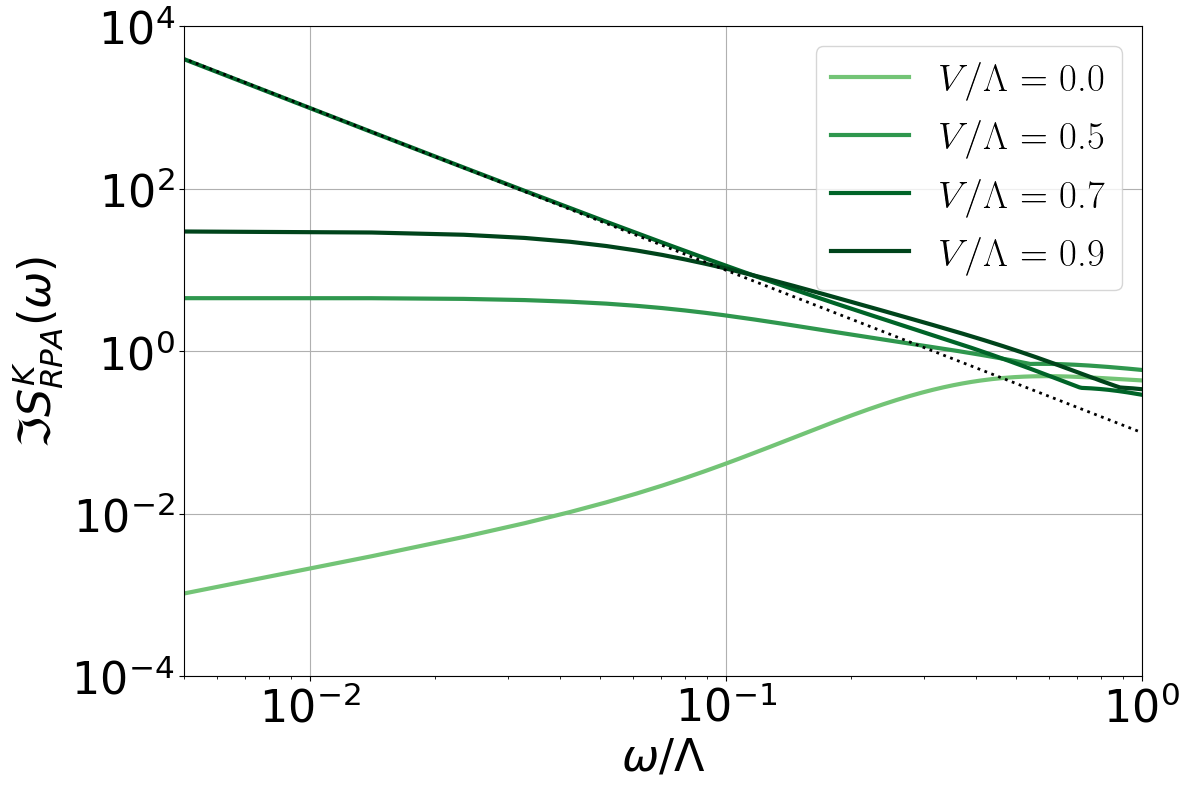

In [8]:

###! Case 1: 

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(voltageSpace1)):
    plt.plot(omegaSpace/2, keldyshTotTzero[i,:].real,  label=r'$V/\Lambda$ = ' + str(round(voltageSpace1[i]/2,1)), linewidth=3, color=colorsTzero[i])
plt.legend(fontsize=28)
plt.grid()

omegaSpaceAux = np.linspace(1e-5, 1.0, 100)

plt.plot(omegaSpaceAux, 0.1*omegaSpaceAux**(-2), linewidth=2, linestyle='dotted', color="black")

plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.005, 1)
plt.ylim(1e-4, 1e4)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{RPA}^K(\omega)$', fontsize=32)
plt.tight_layout()
plt.savefig("panelsCurrentNoise/ImSK_RPA_Vomega.png", bbox_inches='tight', dpi=600)



In [9]:

###! just to correct some small noisy bumps on the plot
omega_test = omegaSpace[100:114]
slope = (retardedTotTzero[2,114].real - retardedTotTzero[2,100].real) / (omegaSpace[114] - omegaSpace[100])
y_test = slope * omega_test 
retardedTotTzero[2,100:114].real =  y_test



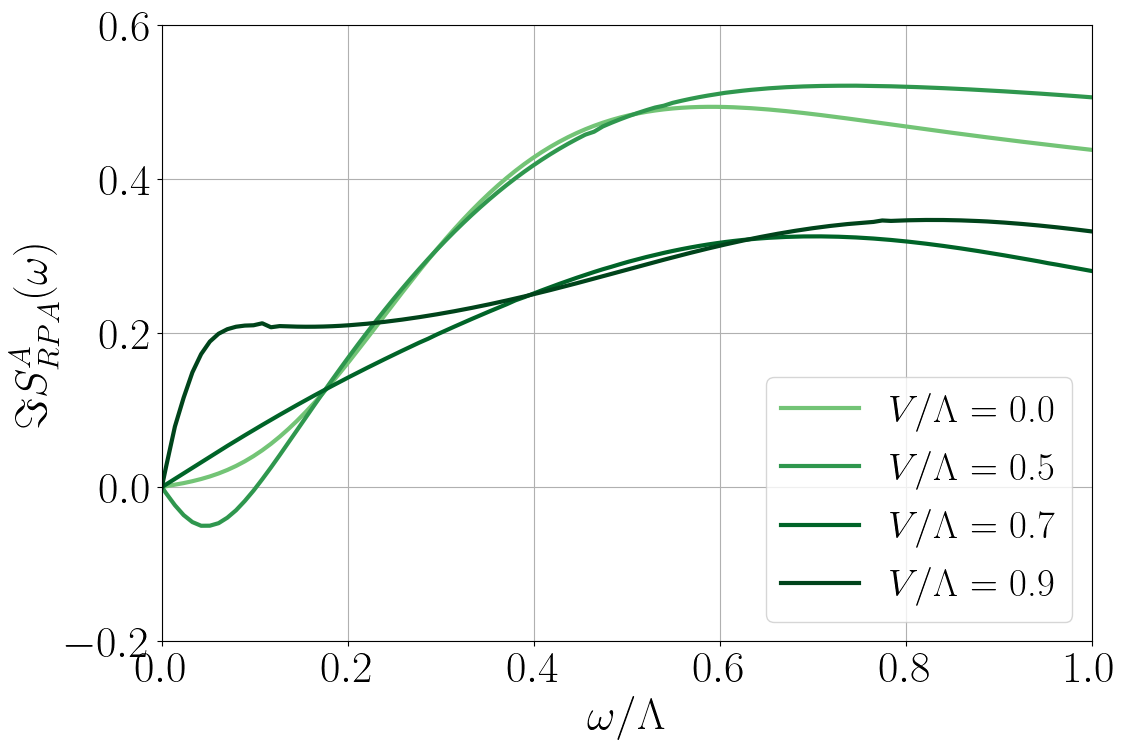

In [10]:



fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(voltageSpace1)):
    
    plt.plot(omegaSpace/2, retardedTotTzero[i,:].real, label=r'$V/\Lambda$ = ' + str(round(voltageSpace1[i]/2,1)), linewidth=3, color=colorsTzero[i])



plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)


# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.0, 1)
plt.ylim(-0.2, 0.6)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{RPA}^A(\omega)$', fontsize=32)
plt.savefig("panelsCurrentNoise/ImSR_RPA_Vomega.png", bbox_inches='tight', dpi=600)


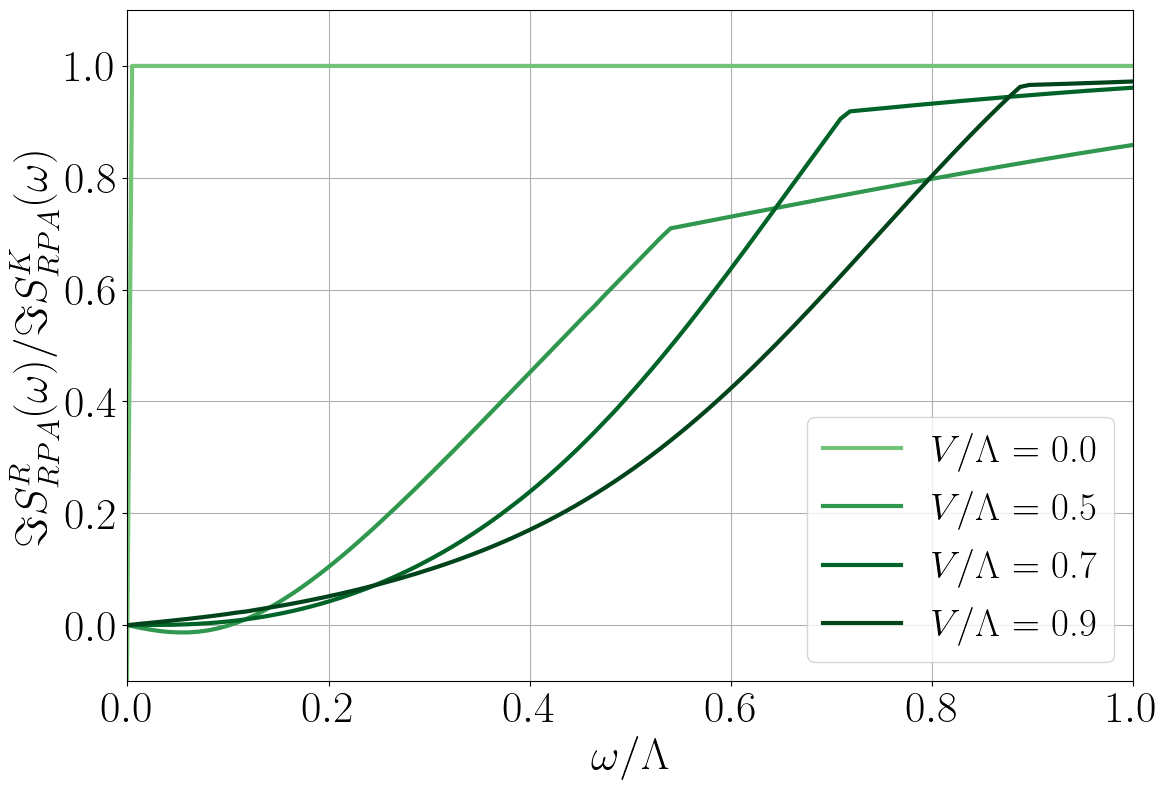

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(0,len(voltageSpace1)):
    plt.plot(omegaSpace/2, retardedTotTzero[i,:].real/keldyshTotTzero[i, :].real, label=r'$V/\Lambda$ = ' + str(round(voltageSpace1[i]/2,1)), linewidth=3, color=colorsTzero[i])
plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)


plt.xlim(0.0, 1)
plt.ylim(-0.1, 1.1)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{RPA}^R(\omega)/\Im S_{RPA}^K(\omega)$', fontsize=32)
plt.tight_layout()
plt.savefig("panelsCurrentNoise/FDR_RPA_Vomega.png", bbox_inches='tight', dpi=600)

In [12]:
# ping()

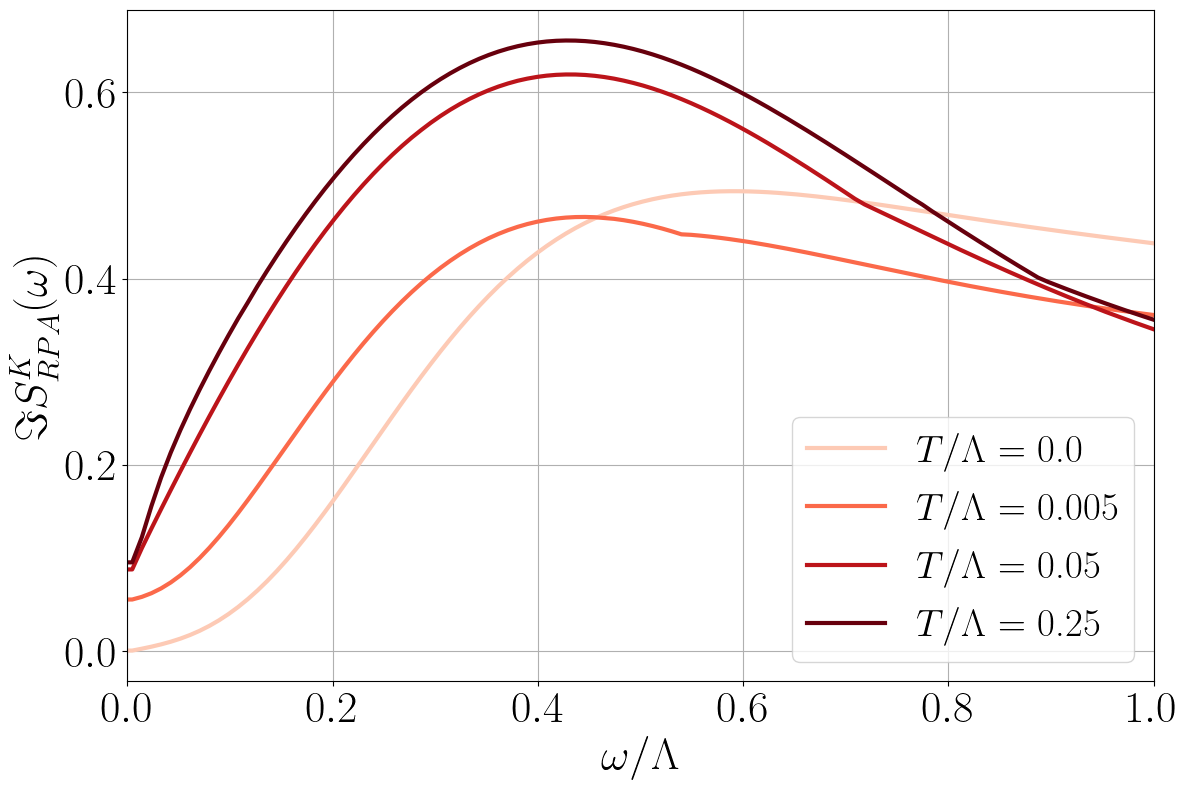

In [13]:

###! Case 2: 

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(TSpace2)):
    plt.plot(omegaSpace/2, keldyshTotVzero[i,:].real,  label=r'$T/\Lambda$ = ' + str(round(TSpace2[i]/2,3)), linewidth=3, color=colorsVzero[i])
plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.0, 1)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{RPA}^K(\omega)$', fontsize=32)
plt.tight_layout()
plt.savefig("panelsCurrentNoise/ImSK_RPA_Tomega.png", bbox_inches='tight', dpi=600)

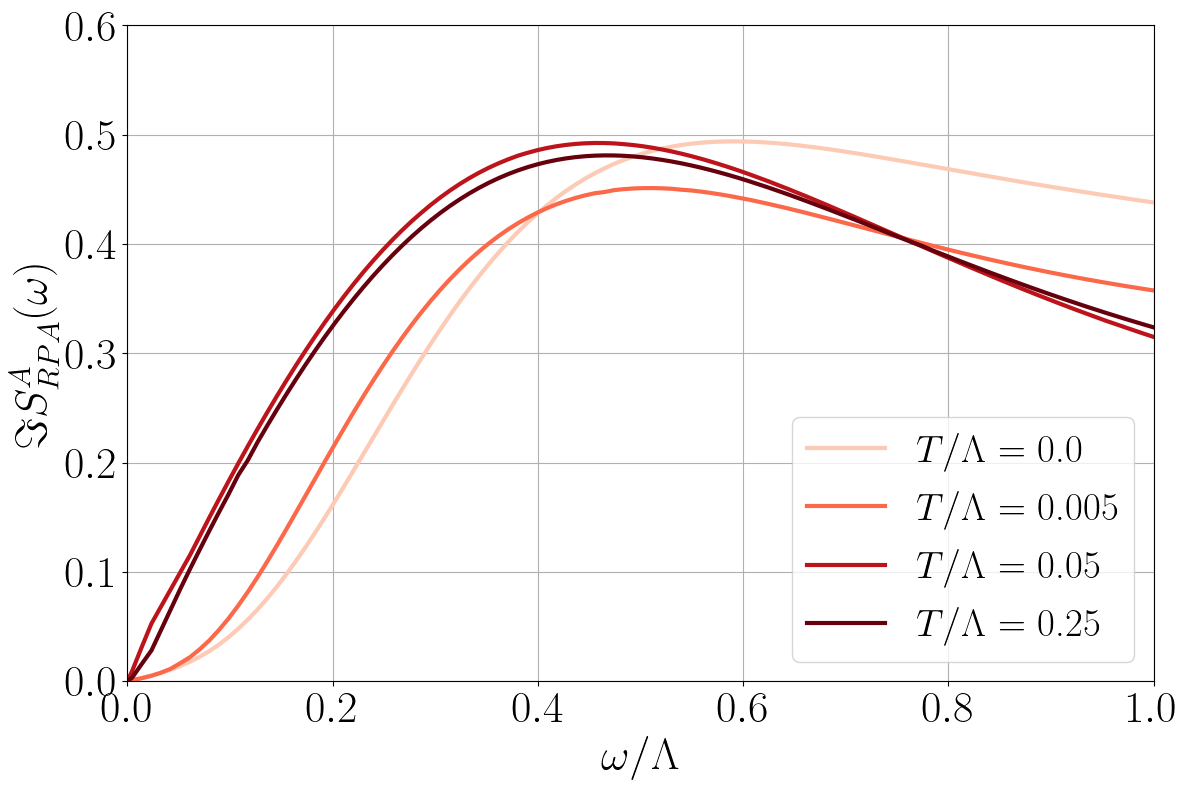

In [14]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'


##* Linear Interpolation on the noisy part
retardedTotVzero[2,110:113].real = np.nan
retardedAux = (retardedTotVzero[2,:].real).copy()
x = np.arange(retardedAux.size)
good = np.isfinite(retardedAux)
arr_interp = retardedAux.copy()
retardedTotVzero[2,~good] = np.interp(x[~good], x[good], arr_interp[good])

for i in range(len(TSpace2)):

    plt.plot(omegaSpace/2, retardedTotVzero[i,:].real, label=r'$T/\Lambda$ = ' + str(round(TSpace2[i]/2,3)), linewidth=3, color=colorsVzero[i])



plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.0, 1)
plt.ylim(0.0, 0.6)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{RPA}^A(\omega)$', fontsize=32)
plt.tight_layout()
plt.savefig("panelsCurrentNoise/ImSR_RPA_Tomega.png", bbox_inches='tight', dpi=600)

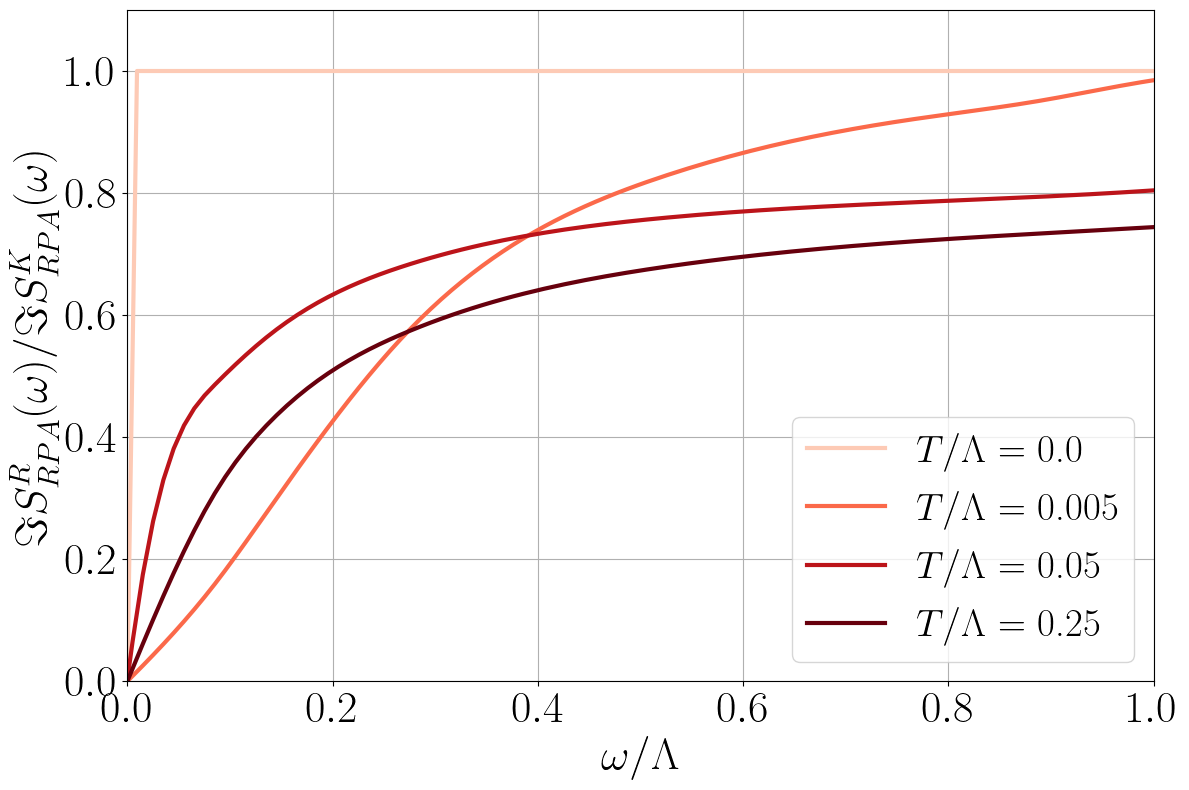

In [15]:






fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(0,len(TSpace2)):
    
    if i > 0:
        spl = UnivariateSpline(omegaSpace, retardedTotVzero[i,:].real/keldyshTotVzero[i, :].real)
        spl.set_smoothing_factor(0.001)
        x_smooth = np.linspace(omegaSpace.min(), omegaSpace.max(), 400)
        y_smooth_spline = spl(x_smooth)
        plt.plot(x_smooth, y_smooth_spline, label=r'$T/\Lambda$ = ' + str(round(TSpace2[i]/2,3)), linewidth=3, color=colorsVzero[i])
    else:
        plt.plot(omegaSpace, retardedTotVzero[i,:].real/keldyshTotVzero[i, :].real, label=r'$T/\Lambda$ = ' + str(round(TSpace2[i]/2,3)), linewidth=3, color=colorsVzero[i])
        
    # plt.plot(omegaSpace, retardedTotVzero[i,:].real/keldyshTotVzero[i, :].real, label=r'$T/\Lambda$ = ' + str(round(TSpace2[i]/2,3)), linewidth=3, color=colorsVzero[i])
plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.1)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{RPA}^R(\omega)/\Im S_{RPA}^K(\omega)$', fontsize=32)
plt.tight_layout()
plt.savefig("panelsCurrentNoise/FDR_RPA_Tomega.png", bbox_inches='tight', dpi=600)